*Read sections 4.1 - 4.3 of the book before using these notes.*

*Note that in this course, lecture notes are not sufficient, you must read the book for better understanding. Lecture notes are just implementing the concepts of the book on a dataset, but not explaining the concepts elaborately.*

## Theory Behind Logistic Regression

Logistic regression is the go-to linear classification algorithm for two-class problems. It is easy to implement, easy to understand and gets great results on a wide variety of problems, even when the expectations the method has for your data are violated.

### Description

Logistic regression is named for the function used at the core of the method, the [logistic function](https://en.wikipedia.org/wiki/Logistic_function).

The logistic function, also called the **`Sigmoid function`** was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$$\frac{1}{1 + e^{-x}}$$

$e$ is the base of the natural logarithms and $x$ is value that you want to transform via the logistic function.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

Text(0.5, 1.0, 'Sigmoid Function')

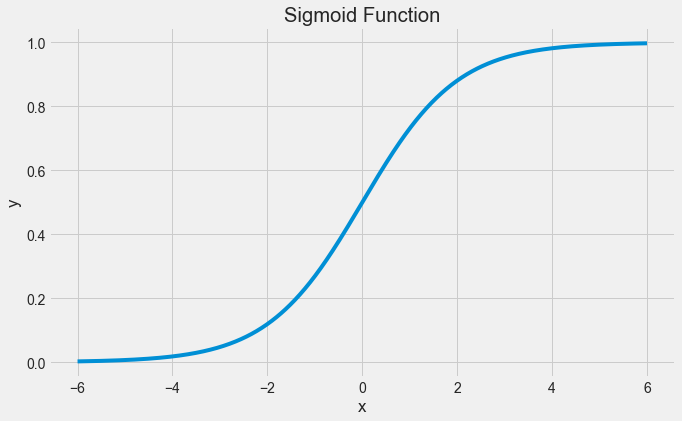

In [2]:
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
x = np.linspace(-6, 6, num=1000)
plt.figure(figsize=(10, 6))
plt.plot(x, (1 / (1 + np.exp(-x))))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sigmoid Function")

The logistic regression equation has a very similar representation like linear regression. The difference is that the output value being modelled is binary in nature.

$$\hat{p}=\frac{e^{\hat{\beta_0}+\hat{\beta_1}x_1}}{1+e^{\hat{\beta_0}+\hat{\beta_1}x_1}}$$

or

$$\hat{p}=\frac{1.0}{1.0+e^{-(\hat{\beta_0}+\hat{\beta_1}x_1)}}$$

$\hat{\beta_0}$ is the estimated intercept term

$\hat{\beta_1}$ is the estimated coefficient for $x_1$

$\hat{p}$ is the predicted output with real value between 0 and 1. To convert this to binary output of 0 or 1, this would either need to be rounded to an integer value or a cutoff point be provided to specify the class segregation point.

### Learning the Logistic Regression Model

The coefficients (Beta values b) of the logistic regression algorithm must be estimated from your training data. This is done using [maximum-likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation).

Maximum-likelihood estimation is a common learning algorithm used by a variety of machine learning algorithms, although it does make assumptions about the distribution of your data (more on this when we talk about preparing your data).

The best coefficients should result in a model that would predict a value very close to 1 (e.g. male) for the default class and a value very close to 0 (e.g. female) for the other class. The intuition for maximum-likelihood for logistic regression is that a search procedure seeks values for the coefficients (Beta values) that maximize the likelihood of the observed data. In other words, in MLE, we estimate the parameter values (Beta values) which are the most likely to produce that data at hand.

Here is an analogy to understand the idea behind Maximum Likelihood Estimation (MLE). Let us say, you are listening to a song (data). You are not aware of the singer (parameter) of the song. With just the musical piece at hand, you try to guess the singer (parameter) who you feel is the most likely (MLE) to have sung that song. Your are making a maximum likelihood estimate! Out of all the singers (parameter space) you have chosen them as the one who is the most likely to have sung that song (data).

We are not going to go into the math of maximum likelihood. It is enough to say that a minimization algorithm is used to optimize the best values for the coefficients for your training data. This is often implemented in practice using efficient numerical optimization algorithm (like the Quasi-newton method).

When you are learning logistic, you can implement it yourself from scratch using the much simpler gradient descent algorithm.

### Preparing Data for Logistic Regression
The assumptions made by logistic regression about the distribution and relationships in your data are much the same as the assumptions made in linear regression.

Much study has gone into defining these assumptions and precise probabilistic and statistical language is used. My advice is to use these as guidelines or rules of thumb and experiment with different data preparation schemes.

Ultimately in predictive modeling machine learning projects you are laser focused on making accurate predictions rather than interpreting the results. As such, you can break some assumptions as long as the model is robust and performs well.

- **Binary Output Variable:** This might be obvious as we have already mentioned it, but logistic regression is intended for binary (two-class) classification problems. It will predict the probability of an instance belonging to the default class, which can be snapped into a 0 or 1 classification.
- **Remove Noise:** Logistic regression assumes no error in the output variable (y), consider removing outliers and possibly misclassified instances from your training data.
- **Gaussian Distribution:** Logistic regression is a linear algorithm (with a non-linear transform on output). It does assume a linear relationship between the input variables with the output. Data transforms of your input variables that better expose this linear relationship can result in a more accurate model. For example, you can use log, root, Box-Cox and other univariate transforms to better expose this relationship.
- **Remove Correlated Inputs:** Like linear regression, the model can overfit if you have multiple highly-correlated inputs. Consider calculating the pairwise correlations between all inputs and removing highly correlated inputs.
- **Fail to Converge:** It is possible for the expected likelihood estimation process that learns the coefficients to fail to converge. This can happen if there are many highly correlated inputs in your data or the data is very sparse (e.g. lots of zeros in your input data).

## Logistic Regression: Scikit-learn vs Statsmodels
Python gives us two ways to do logistic regression. Statsmodels offers modeling from the perspective of statistics. Scikit-learn offers some of the same models from the perspective of machine learning.

So we need to understand the difference between statistics and machine learning! Statistics makes mathematically valid inferences about a population based on sample data. Statistics answers the question, “What is the evidence that X is related to Y?” Machine learning has the goal of optimizing predictive accuracy rather than inference. Machine learning answers the question, “Given X, what prediction should we make for Y?”

Let us see the use of `statsmodels` for logistic regression. We'll see scikit-learn later in the course, when we learn methods that focus on prediction.

## Training a logistic regression model

Read the data on social network ads. The data shows if the person purchased a product when targeted with an ad on social media. Fit a logistic regression model to predict if a user will purchase the product based on their characteristics such as age, gender and estimated salary.

In [131]:
train = pd.read_csv('./Datasets/Social_Network_Ads_train.csv') #Develop the model on train data
test = pd.read_csv('./Datasets/Social_Network_Ads_test.csv') #Test the model on test data

In [7]:
train.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15755018,Male,36,33000,0
1,15697020,Female,39,61000,0
2,15796351,Male,36,118000,1
3,15665760,Male,39,122000,1
4,15794661,Female,26,118000,0


### Examining the Distribution of the Target Column
Make sure our target is not severely imbalanced.

In [9]:
train.Purchased.value_counts()

0    194
1    106
Name: Purchased, dtype: int64

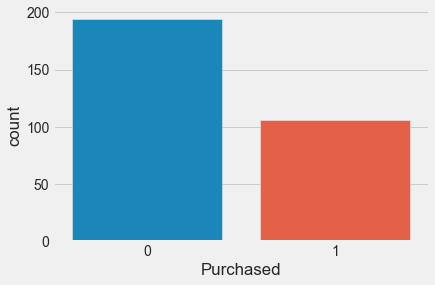

In [12]:
sns.countplot(x = 'Purchased',data = train);

Let us try to fit a linear regression model, instead of logistic regression. We fit a linear regression model to predict probability of purchase based on age.

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

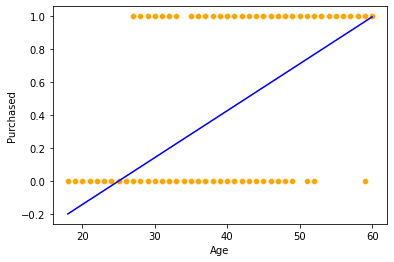

In [9]:
sns.scatterplot(x = 'Age', y = 'Purchased', data = train, color = 'orange') #Visualizing data
lm = sm.ols(formula = 'Purchased~Age', data = train).fit() #Developing linear regression model
sns.lineplot(x = 'Age', y= lm.predict(train), data = train, color = 'blue') #Visualizing model

Note the issues with the linear regression model:

1. The regression line goes below 0 and over 1. However, probability of purchase must be in \[0,1\]. 

2. The linear regression model does not seem to fit the data well.

### Fitting the logistic regression model

Now, let us fit a logistic regression model to predict probability of purchase based on `Age`.

Optimization terminated successfully.
         Current function value: 0.430107
         Iterations 7


<AxesSubplot:xlabel='Age', ylabel='Purchased'>

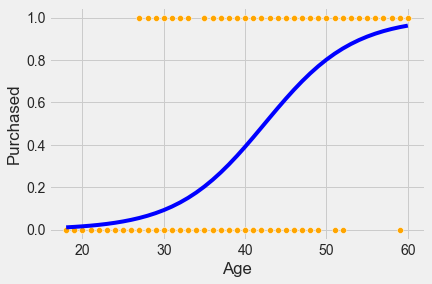

In [96]:
sns.scatterplot(x = 'Age', y = 'Purchased', data = train, color = 'orange') #Visualizing data
logit_model = sm.logit(formula = 'Purchased~Age', data = train).fit() #Developing logistic regression model
sns.lineplot(x = 'Age', y= logit_model.predict(train), data = train, color = 'blue') #Visualizing model

As logistic regression uses the sigmoid function, the probability stays in \[0,1\]. Also, it seems to better fit the points as compared to linear regression.

In [16]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  300
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            1
Date:                Tue, 19 Apr 2022   Pseudo R-squ.:                  0.3378
Time:                        16:46:02   Log-Likelihood:                -129.03
converged:                       True   LL-Null:                       -194.85
Covariance Type:            nonrobust   LLR p-value:                 1.805e-30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8102      0.885     -8.825      0.000      -9.545      -6.076
Age            0.1842      0.022      8.449      0.000       0.141       0.227
==============================================================================
"""

**Interpret the coefficient of age** 

For a unit increase in age, the log odds of purchase increase by 0.18, or the odds of purchase get multiplied by exp(0.18) = 1.2

**Is the increase in probability of purchase constant with a unit increase in age?**

No, it depends on age.

**Is gender associated with probability of purchase?**

In [17]:
logit_model_gender = sm.logit(formula = 'Purchased~Gender', data = train).fit()
logit_model_gender.summary()

Optimization terminated successfully.
         Current function value: 0.648804
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  300
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            1
Date:                Tue, 19 Apr 2022   Pseudo R-squ.:                0.001049
Time:                        16:46:04   Log-Likelihood:                -194.64
converged:                       True   LL-Null:                       -194.85
Covariance Type:            nonrobust   LLR p-value:                    0.5225
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.5285      0.168     -3.137      0.002      -0.859      -0.198
Gender[T.Male]    -0.1546      0.242     -0.639      0.523      -0.629       0.319
==================================================================================
"""

No, assuming a significance level of $\alpha = 5\%$, `Gender` is not associated with probability of default, as the $p$-value for `Male` is greater than 0.05.

## Confusion matrix and classification accuracy

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. 

In [3]:
#Function to compute confusion matrix and prediction accuracy on training data
def confusion_matrix_train(model,cutoff=0.5):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))

Find the confusion matrix and classification accuracy of the model with `Age` as the predictor on training data.

Classification accuracy = 83.3%


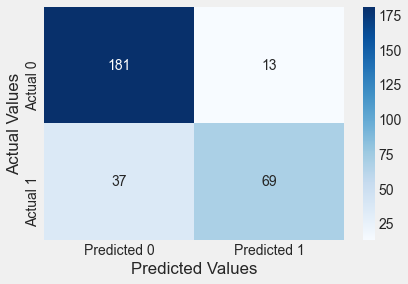

In [98]:
cm = confusion_matrix_train(logit_model)

**Confusion matrix:**

- Each row: actual class
- Each column: predicted class

First row: Non-purchasers, the negative class:

- 181 were correctly classified as Non-purchasers. **True negatives**. 
- Remaining 13 were wrongly classified as Non-purchasers. **False positive**


Second row: Purchasers, the positive class:

- 37 were incorrectly classified as Non-purchasers. **False negatives**
- 69 were correctly classified Purchasers. **True positives**

In [4]:
#Function to compute confusion matrix and prediction accuracy on test data
def confusion_matrix_test(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))

Find the confusion matrix and classification accuracy of the model with `Age` as the predictor on test data.

Classification accuracy = 86.0%


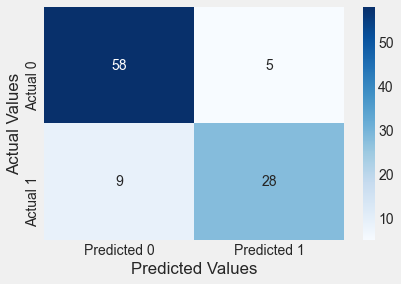

In [101]:
confusion_matrix_test(test,test.Purchased,logit_model)

The model classifies a bit more accurately on test data as compared to the training data, which is a bit unusual. However, it shows that the model did not overfit on training data.

**Include `EstimatedSalary` as a predictor in the above model**

In [102]:
logit_model2 = sm.logit(formula = 'Purchased~Age+EstimatedSalary', data = train).fit()
logit_model2.summary()

Optimization terminated successfully.
         Current function value: 0.358910
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  300
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            2
Date:                Tue, 14 Feb 2023   Pseudo R-squ.:                  0.4474
Time:                        12:03:29   Log-Likelihood:                -107.67
converged:                       True   LL-Null:                       -194.85
Covariance Type:            nonrobust   LLR p-value:                 1.385e-38
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -11.9432      1.424     -8.386      0.000     -14.735      -9.152
Age                 0.2242      0.028      7.890      0.000       0.168       0.280
EstimatedSalary   3.48e-05   6.15e-06      5.660      0.000    2.27e-05    4.68e-05
===================================================================================
"""

Classification accuracy = 83.3%


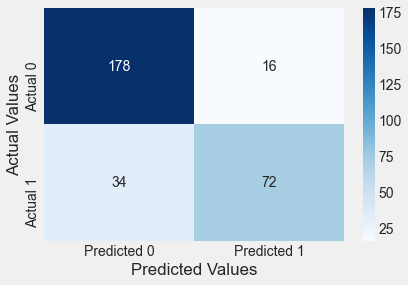

In [103]:
confusion_matrix_train(logit_model2)

Classification accuracy = 89.0%


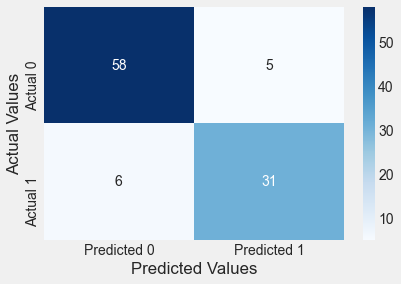

In [104]:
confusion_matrix_test(test,test.Purchased,logit_model2)

The log likelihood of the model has increased, while also increasing the prediction accuracy on test data, which shows that the additional predictor is helping explain the response better, without overfitting the data.

**Include `Gender` as a predictor in the above model**

In [132]:
logit_model = sm.logit(formula = 'Purchased~Age+EstimatedSalary+Gender', data = train).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.357327
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  300
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            3
Date:                Tue, 14 Feb 2023   Pseudo R-squ.:                  0.4498
Time:                        12:17:28   Log-Likelihood:                -107.20
converged:                       True   LL-Null:                       -194.85
Covariance Type:            nonrobust   LLR p-value:                 9.150e-38
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.2531      1.478     -8.293      0.000     -15.149      -9.357
Gender[T.Male]      0.3356      0.346      0.970      0.332      -0.342       1.013
Age                 0.2275      0.029      7.888      0.000       0.171       0.284
EstimatedSalary  3.494e-05   6.17e-06      5.666      0.000    2.29e-05     4.7e-05
===================================================================================
"""

Classification accuracy = 84.3%


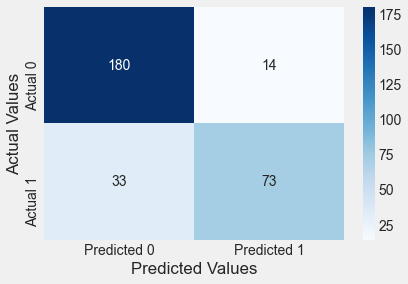

In [106]:
confusion_matrix_train(logit_model)

Classification accuracy = 88.0%


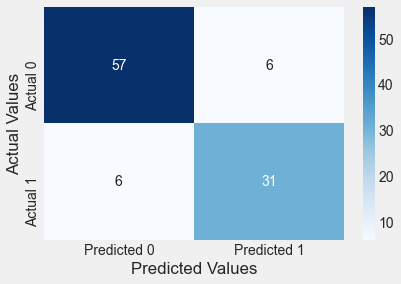

In [107]:
confusion_matrix_test(test,test.Purchased,logit_model)

`Gender` is a statistically insignificant predictor, and including it slightly lowers the classification accuracy on test data. Note that the classification accuracy on training data will continue to increase on adding more predictors, irrespective of their relevance *(similar to the idea of RSS on training data in linear regression)*.

**Is there a residual in logistic regression?**

No, since the response is assumed to have a Bernoulli distribution, instead of a normal distribution.

**Is the odds ratio for a unit increase in a predictor $X_j$, a constant (assuming that the rest of the predictors are held constant)?**

Yes, the odds ratio in this case will $e^{\beta_j}$

## Variable transformations in logistic regression

Read the dataset *diabetes.csv* that contains if a person has diabetes (`Outcome = 1`) based on health parameters such as BMI, blood pressure, age etc. Develop a model to predict the probability of a person having diabetes based on their age.

In [5]:
data = pd.read_csv('./Datasets/diabetes.csv')

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Randomly select 80% of the observations to create a training dataset. Create a test dataset with the remaining 20% observations.

In [7]:
#Creating training and test datasets
np.random.seed(2)
train = data.sample(round(data.shape[0]*0.8))
test = data.drop(train.index)

Does `Age` seem to distinguish `Outcome` levels?

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

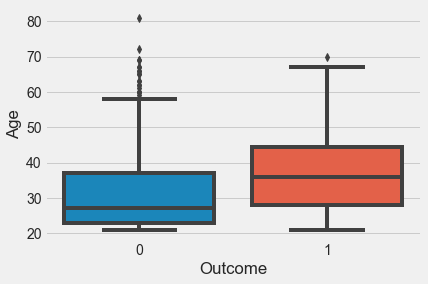

In [6]:
sns.boxplot(x = 'Outcome', y = 'Age', data = train)

Yes it does!

Develop and visualize a logistic regression model to predict `Outcome` using `Age`.

Optimization terminated successfully.
         Current function value: 0.612356
         Iterations 5
-375.9863802089716


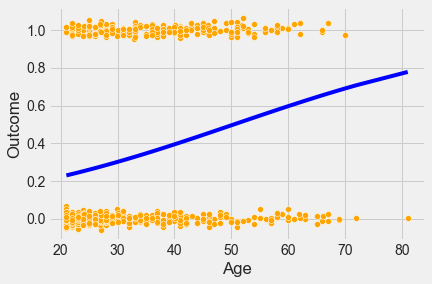

In [190]:
#Jittering points to better see the density of points in any given region of the plot
def jitter(values,j):
    return values + np.random.normal(j,0.02,values.shape)
sns.scatterplot(x = jitter(train.Age,0), y = jitter(train.Outcome,0), data = train, color = 'orange')
logit_model = sm.logit(formula = 'Outcome~Age', data = train).fit()
sns.lineplot(x = 'Age', y= logit_model.predict(train), data = train, color = 'blue') 
print(logit_model.llf) #Printing the log likelihood to compare it with the next model we build

Classification accuracy = 65.6%


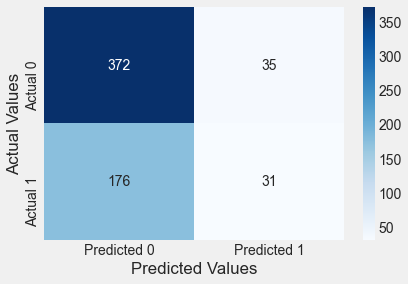

In [140]:
confusion_matrix_train(logit_model)

Classification accuracy on train data = 66%

Classification accuracy = 59.7%


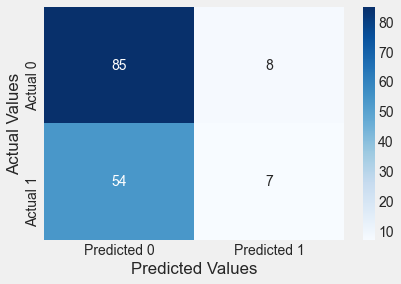

In [141]:
confusion_matrix_test(test,test.Outcome,logit_model)

Classification accuracy on test data = 60%

Can a tranformation of `Age` provide a more accurate model?

Let us visualize how the probability of people having diabetes varies with `Age`. We will bin `Age` to get the percentage of people having diabetes within different `Age` bins.

In [8]:
#Binning Age
binned_age = pd.qcut(train['Age'],11,retbins=True)
train['age_binned'] = binned_age[0]

In [9]:
#Finding percentage of people having diabetes in each Age bin
age_data = train.groupby('age_binned')['Outcome'].agg([('diabetes_percent','mean'),('nobs','count')]).reset_index(drop=False)
age_data

,age_binned,diabetes_percent,nobs
0,"(20.999, 22.0]",0.110092,109
1,"(22.0, 23.0]",0.206897,29
2,"(23.0, 25.0]",0.243243,74
3,"(25.0, 26.0]",0.259259,27
4,"(26.0, 28.0]",0.271186,59
5,"(28.0, 31.0]",0.415094,53
6,"(31.0, 35.0]",0.434783,46
7,"(35.0, 39.0]",0.450980,51
8,"(39.0, 43.545]",0.500000,54
9,"(43.545, 52.0]",0.576271,59


Text(0.5, 0, 'Age_bin')

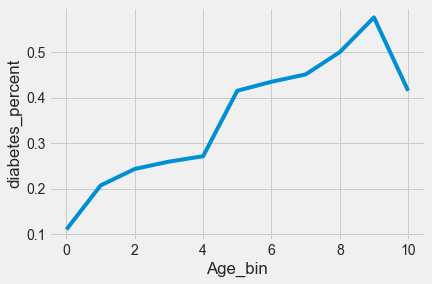

In [9]:
#Visualizing percentage of people having diabetes with increasing Age (or Age bins)
sns.lineplot(x = age_data.index, y= age_data['diabetes_percent'])
plt.xlabel('Age_bin')

We observe that the probability of people having diabetes does **not** keep increasing monotonically with age. People with ages 52 and more have a lower probability of having diabetes than people in the immediately younger `Age` bin.

A quadratic transformation of `Age` may better fit the above trend

Optimization terminated successfully.
         Current function value: 0.586025
         Iterations 6


-359.81925590230185

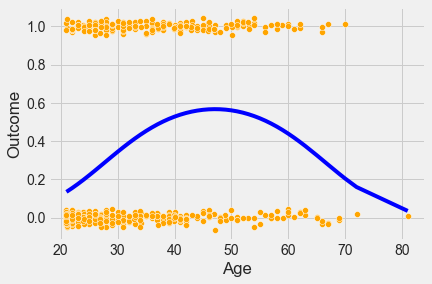

In [145]:
#Model with the quadratic transformation of Age
def jitter(values,j):
    return values + np.random.normal(j,0.02,values.shape)
sns.scatterplot(x = jitter(train.Age,0), y = jitter(train.Outcome,0), data = train, color = 'orange')
logit_model = sm.logit(formula = 'Outcome~Age+I(Age**2)', data = train).fit()
sns.lineplot(x = 'Age', y= logit_model.predict(train), data = train, color = 'blue') 
logit_model.llf

In [146]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      611
Method:                           MLE   Df Model:                            2
Date:                Tue, 14 Feb 2023   Pseudo R-squ.:                 0.08307
Time:                        12:25:54   Log-Likelihood:                -359.82
converged:                       True   LL-Null:                       -392.42
Covariance Type:            nonrobust   LLR p-value:                 6.965e-15
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -6.6485      0.908     -7.320      0.000      -8.429      -4.868
Age             0.2936      0.048      6.101      0.000       0.199       0.388
I(Age ** 2)    -0.0031      0.001     -5.280      0.000      -0.004      -0.002
===============================================================================
"""

The log likelihood of the model is higher and both the predictors are statistically significant indicating a better model fit. However, the model may also be overfitting. Let us check the model accuracy on test data.

Classification accuracy = 68.1%


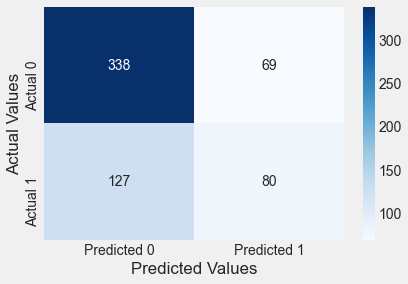

In [147]:
confusion_matrix_train(logit_model)

Classification accuracy = 68.8%


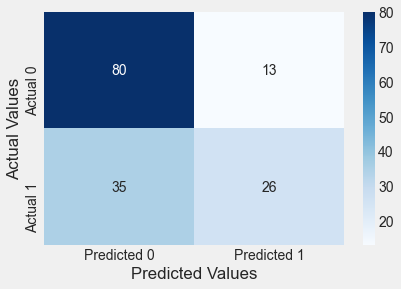

In [148]:
confusion_matrix_test(test,test.Outcome,logit_model)

The classification accuracy on test data has increased to 69%. However, the number of *false positives* have increased. But in case of diabetes, *false negatives* are more concerning than *false positives*. This is because if a person has diabetes, and is told that they do not have diabetes, their condition may deteriorate. If a person does not have diabetes, and is told that they have diabetes, they may take unnecessary precautions or tests, but it will not be as harmful to the person as in the previous case. So, in this problem, we will be more focused on reducing the number of *false negatives*, instead of reducing the *false positives* or increasing the overall classification accuracy.

We can decrease the cutoff for classifying a person as having diabetes to reduce the number of false negatives.

Classification accuracy = 69.5%


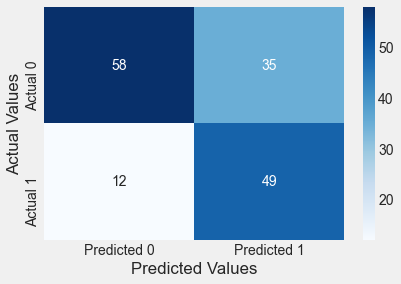

In [149]:
#Reducing the cutoff for classifying a person as diabetic to 0.3 (instead of 0.5)
confusion_matrix_test(test,test.Outcome,logit_model,0.3)

Note that the changed cut-off reduced the number of *false negatives*, but at the cost of increasing the *false positives*. However, the stakeholders may prefer the reduced cut-off to be safer.

**Is there another way to transform `Age`?**

Yes, binning age into bins that have similar proportion of people with diabetes may provide a better model fit.

In [10]:
#Creating a function to bin age so that it can be applied to both the test and train datasets
def var_transform(data):
    binned_age = pd.qcut(train['Age'],10,retbins=True)
    bins = binned_age[1]
    data['age_binned'] = pd.cut(data['Age'],bins = bins)
    dum = pd.get_dummies(data.age_binned,drop_first = True)
    dum.columns = ['age'+str(x) for x in range(1,len(bins)-1)]
    data = pd.concat([data,dum], axis = 1)
    return data

In [11]:
#Binning age using the function var_transform()
train = var_transform(train)
test = var_transform(test)

Text(0.5, 0, 'Age_bin')

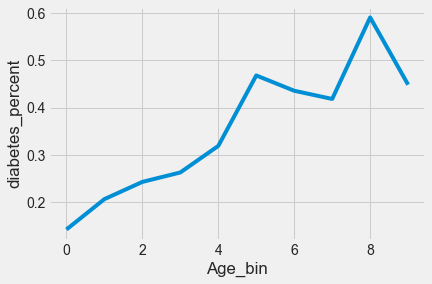

In [12]:
#Re-creating the plot of diabetes_percent vs age created earlier, just to check if the function binned age correctly. Yes, it did.
age_data = train.groupby('age_binned')['Outcome'].agg([('diabetes_percent','mean'),('nobs','count')]).reset_index(drop=False)
sns.lineplot(x = age_data.index, y= age_data['diabetes_percent'])
plt.xlabel('Age_bin')

Optimization terminated successfully.
         Current function value: 0.585956
         Iterations 6


<AxesSubplot:xlabel='Age', ylabel='Outcome'>

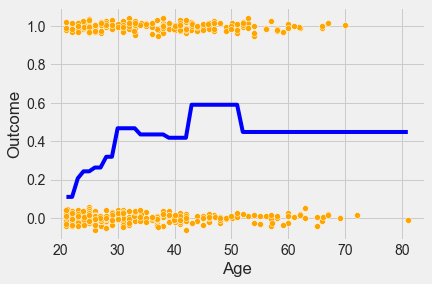

In [25]:
#Model with binned Age
def jitter(values,j):
    return values + np.random.normal(j,0.02,values.shape)
sns.scatterplot(x = jitter(train.Age,0), y = jitter(train.Outcome,0), data = train, color = 'orange')
logit_model = sm.logit(formula = 'Outcome~' + '+'.join(['age'+str(x) for x in range(1,10)]), data = train).fit()
sns.lineplot(x = 'Age', y= logit_model.predict(train), data = train, color = 'blue') 

In [26]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      604
Method:                           MLE   Df Model:                            9
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                 0.08318
Time:                        14:19:51   Log-Likelihood:                -359.78
converged:                       True   LL-Null:                       -392.42
Covariance Type:            nonrobust   LLR p-value:                 1.273e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0898      0.306     -6.829      0.000      -2.690      -1.490
age1           0.7461      0.551      1.354      0.176      -0.334       1.826
age2           0.9548      0.409      2.336      0.019       0.154       1.756
age3           1.0602      0.429      2.471      0.013       0.219       1.901
age4           1.3321      0.438      3.044      0.002       0.474       2.190
age5           1.9606      0.398      4.926      0.000       1.180       2.741
age6           1.8303      0.399      4.586      0.000       1.048       2.612
age7           1.7596      0.410      4.288      0.000       0.955       2.564
age8           2.4544      0.402      6.109      0.000       1.667       3.242
age9           1.8822      0.404      4.657      0.000       1.090       2.674
==============================================================================
"""

Note that the probability of having diabetes for each age bin is a constant, as per the above plot.

Classification accuracy = 67.5%


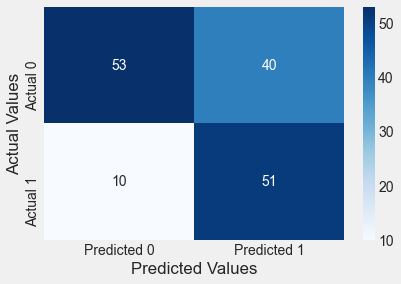

In [27]:
confusion_matrix_test(test,test.Outcome,logit_model,0.3)

Binning `Age` provides a similar result as compared to the model with the quadratic transformation of `Age`.

In [28]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_binned,age1,age2,age3,age4,age5,age6,age7,age8,age9
158,2,88,74,19,53,29.0,0.229,22,0,"(21.0, 22.0]",0,0,0,0,0,0,0,0,0
251,2,129,84,0,0,28.0,0.284,27,0,"(25.0, 27.0]",0,0,1,0,0,0,0,0,0
631,0,102,78,40,90,34.5,0.238,24,0,"(23.0, 25.0]",0,1,0,0,0,0,0,0,0
757,0,123,72,0,0,36.3,0.258,52,1,"(51.0, 81.0]",0,0,0,0,0,0,0,0,1
689,1,144,82,46,180,46.1,0.335,46,1,"(42.0, 51.0]",0,0,0,0,0,0,0,1,0


In [10]:
#Model with the quadratic transformation of Age and more predictors
logit_model_diabetes = sm.logit(formula = 'Outcome~Age+I(Age**2)+Glucose+BloodPressure+BMI+DiabetesPedigreeFunction', data = train).fit()
logit_model_diabetes.summary()

Optimization terminated successfully.
         Current function value: 0.470478
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      607
Method:                           MLE   Df Model:                            6
Date:                Thu, 23 Feb 2023   Pseudo R-squ.:                  0.2639
Time:                        10:26:00   Log-Likelihood:                -288.87
converged:                       True   LL-Null:                       -392.42
Covariance Type:            nonrobust   LLR p-value:                 5.878e-42
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -12.3347      1.282     -9.621      0.000     -14.847      -9.822
Age                          0.2852      0.056      5.121      0.000       0.176       0.394
I(Age ** 2)                 -0.0030      0.001     -4.453      0.000      -0.004      -0.002
Glucose                      0.0309      0.004      8.199      0.000       0.024       0.038
BloodPressure               -0.0141      0.006     -2.426      0.015      -0.025      -0.003
BMI                          0.0800      0.016      4.978      0.000       0.049       0.112
DiabetesPedigreeFunction     0.7138      0.322      2.213      0.027       0.082       1.346
============================================================================================
"""

Adding more predictors has increased the log likelihood of the model as expected.

Classification accuracy = 74.3%


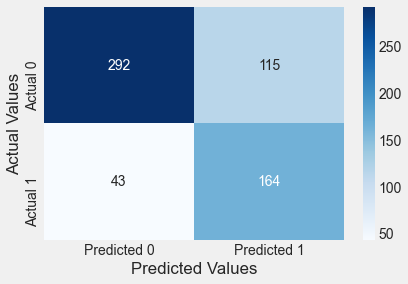

In [34]:
confusion_matrix_train(logit_model_diabetes,cutoff=0.3)

Classification accuracy = 80.5%


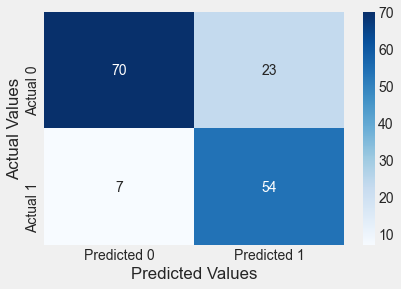

In [163]:
confusion_matrix_test(test,test.Outcome,logit_model_diabetes,0.3)

The model with more predictors also has lesser number of *false negatives*, and higher overall classification accuracy.

**How many bins must you make for `Age` to get the most accurate model?** \
If the number of bins are too less, the trend may not be captured accurately. If the number of bins are too many, it may lead to overfitting of the model. There is an optimal value of the number of bins that captures the trend, but does not overfit. A couple of ways of estimating the optimal number of bins can be:

1.  The number of bins for which the trend continues to be "almost" the same for several samples of the data. 

2. Testing the model on multiple test datasets.

Optimizing the number of bins for each predictor may be a time-consuming exercises. You may do it for your course project. However, we will not do it here in the class notes.

## Performance Measurement

We have already seen the confusion matrix, and classification accuracy. Now, let us see some other useful performance metrics that can be computed from the confusion matrix. The metrics below are computed for the confusion matrix immediately above this section *(or the confusion matrix on test data corresponding to the model `logit_model_diabetes`)*.

### Precision-recall

**Precision** measures the accuracy of positive predictions. Also called the `precision` of the classifier 

$$\textrm{precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$

==> `70.13%`

`Precision` is typically used with `recall` (`Sensitivity` or `True Positive Rate`). The ratio of positive instances that are correctly detected by the classifier.

$$\textrm{recall} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Negatives}}$$ ==> `88.52%`

**Precision / Recall Tradeoff**: Increasing precision reduces recall and vice versa.

**Visualize the precision-recall curve for the model `logit_model_diabetes`**.

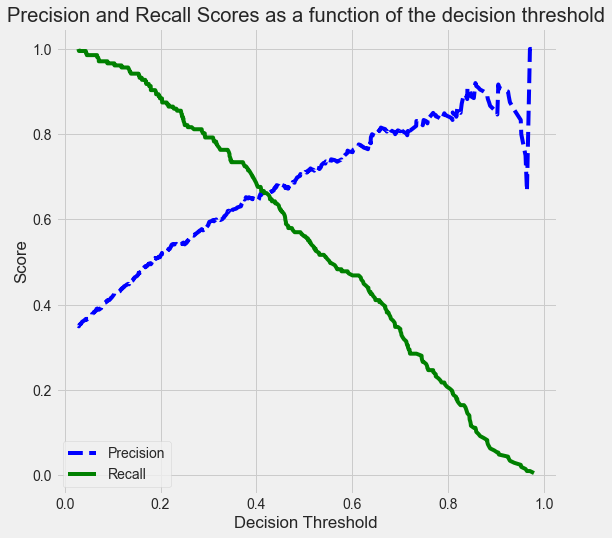

In [36]:
from sklearn.metrics import precision_recall_curve
y=train.Outcome
ypred = logit_model_diabetes.predict(train)
p, r, thresholds = precision_recall_curve(y, ypred)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)

As the decision threshold probability increases, the precision increases, while the recall decreases.

**Q:** How are the values of the `thresholds` chosen to make the precision-recall curve?

**Hint:** Look at the documentation for [`precision_recall_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html).

### The Receiver Operating Characteristics (ROC) Curve

A **ROC(Receiver Operator Characteristic Curve)** is a plot of sensitivity (True Positive Rate) on the y axis against (1−specificity) (False Positive Rate) on the x axis for varying values of the threshold t. The 45° diagonal line connecting (0,0) to (1,1) is the ROC curve corresponding to random chance. The ROC curve for the gold standard is the line connecting (0,0) to (0,1) and (0,1) to (1,1).

In [169]:
#| echo: false

# import image module
from IPython.display import Image

# get the image
Image(url="./Datasets/ROC_AUC.png")

In [167]:
#| echo: false

# import image module
from IPython.display import Image

# get the image
Image(url="./Datasets/ROC_dynamic.gif")

An animation to demonstrate how an ROC curve relates to sensitivity and specificity for all possible cutoffs ([Source](https://github.com/dariyasydykova/open_projects/blob/master/ROC_animation/animations/ROC.gif))




**High Threshold:**

- High specificity
- Low sensitivity


**Low Threshold**

- Low specificity
- High sensitivity

The area under ROC is called *Area Under the Curve(AUC)*. AUC gives the rate of successful classification by the logistic model. To get a more in-depth idea of what a ROC-AUC curve is and how is it calculated, here is a good blog [link](https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/).

Here is good [post](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) by google developers on interpreting ROC-AUC, and its advantages / disadvantages.

**Visualize the ROC curve and compute the ROC-AUC for the model `logit_model_diabetes`**.

0.8325914847653979


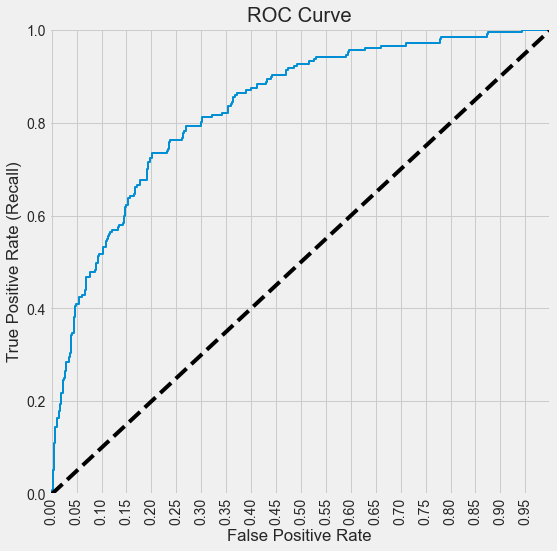

In [41]:
from sklearn.metrics import roc_curve, auc
y=train.Outcome
ypred = logit_model_diabetes.predict(train)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)
print(auc(fpr, tpr))# AUC of ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
plot_roc_curve(fpr, tpr)

**Q:** How are the values of the `auc_thresholds` chosen to make the ROC curve? Why does it look like a step function?

Below is a function that prints the confusion matrix along with all the performance metrics we discussed above for a given decision threshold probability, on train / test data. Note that ROC-AUC does not depend on a decision threshold probability.

In [184]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Classification accuracy = 80.5%
Precision = 70.1%
TPR or Recall = 88.5%
FNR = 11.5%
FPR = 24.7%
ROC-AUC = 90.1%


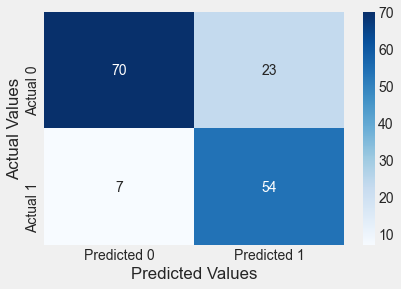

In [185]:
confusion_matrix_data(test,test.Outcome,logit_model_diabetes,0.3)